In [1]:
from ar6.utils.h5 import *
from ar6.utils.statistics import rmse
import numpy as np
import matplotlib.pyplot as pl
import json
import pandas as pd
import scipy.stats as st

NINETY_TO_ONESIGMA = st.norm.ppf(0.95)

## Load observations

In [2]:
df = pd.read_csv('../data_input/AR6_OHC_ensemble_FGDprelim.csv', skiprows=1)
OHCobs = df['Central Estimate Full-depth'].values/0.9
OHC90 = df['Full-depth Uncertainty (1-sigma)'].values*NINETY_TO_ONESIGMA
#OHC90 = np.sqrt(OHC90[0]**2 + OHC90[-1]**2)

In [3]:
xl = pd.read_excel('../data_input/Consolidated GMST time series.xlsx', skiprows=8, skipfooter=9)
Tobs=xl['5-set mean'][:-1].values
years=xl['Unnamed: 0'][:-1].values

## Load runs

In [4]:
results = load_dict_from_hdf5('../data_input_large/twolayer_SSPs.h5')
SAMPLES=2000

/nfs/b0110/Users/mencsm/ar6/src/ar6/utils/h5.py:43: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


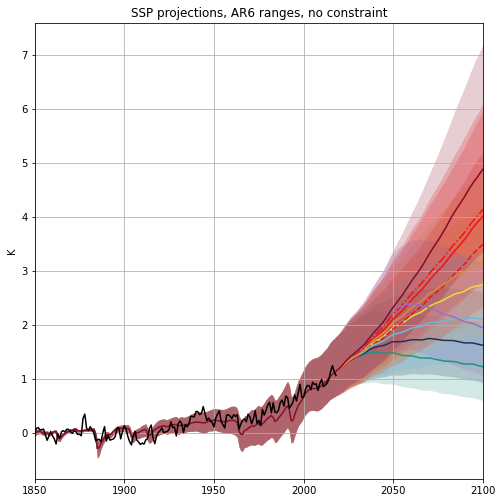

In [5]:
pl.figure(figsize=(18/2.54,18/2.54))

scenarios = ['ssp119','ssp126','ssp245','ssp370','ssp370-lowNTCF-gidden','ssp370-lowNTCF-aerchemmip','ssp434','ssp460','ssp534-over','ssp585']

colors = {
    'ssp119': '#1e9583',
    'ssp126': '#1d3354',
    'ssp245': '#e9dc3d',  # WHY is ssp245 yellow? This infuriates me
    'ssp370': '#f11111',
    'ssp370-lowNTCF-gidden': '#f11111', 
    'ssp370-lowNTCF-aerchemmip': '#f11111',
    'ssp434': '#63bce4',
    'ssp460': '#e78731',
    'ssp534-over': '#996dc8',
    'ssp585': '#830b22',
}

ls = {
    'ssp119': '-',
    'ssp126': '-',
    'ssp245': '-', 
    'ssp370': '-',
    'ssp370-lowNTCF-gidden': '--', 
    'ssp370-lowNTCF-aerchemmip': '-.',
    'ssp434': '-',
    'ssp460': '-',
    'ssp534-over': '-',
    'ssp585': '-',
}

for scenario in scenarios:
    T = results[scenario]['surface_temperature']
    pl.fill_between(
        np.arange(1850, 2101),
        np.percentile(T[100:351,:]-np.mean(T[100:151,:], axis=0), 5, axis=1),
        np.percentile(T[100:351,:]-np.mean(T[100:151,:], axis=0), 95, axis=1), 
        color=colors[scenario], lw=0, alpha=0.2
    )
    pl.plot(
        np.arange(1850, 2101), 
        np.percentile(T[100:351,:]-np.mean(T[100:151,:], axis=0), 50, axis=1),
        color=colors[scenario], ls=ls[scenario]
    )
pl.plot(np.arange(1850, 2019), Tobs, color='black')
pl.grid()
pl.xlim(1850,2100)
pl.title('SSP projections, AR6 ranges, no constraint')
pl.ylabel('K')
pl.tight_layout()

In [7]:
# 2081-2100 warming
np.percentile(np.mean(results[scenario]['surface_temperature'][331:351,:], axis=0)-np.mean(results[scenario]['surface_temperature'][100:151,:], axis=0), (5, 95))

array([3.04638277, 6.46582885])